# About this project

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 


Are there any patterns in the data of the past Nobel laureates?
<br>
What can we learn about the Nobel prize?

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
#enhancing readability
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with a mid-year estimate of July 2nd.

# Data Exploration & Cleaning

In [4]:
df_data.shape

(962, 16)

In [5]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [6]:
df_data.tail()

year  category                                           prize  \
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name  birth_date  \
957    Individual            Michael Houghton  1949-07-02   
958  Organization  World Food Programme (WFP)         NaN   
959    Individual                 Andrea Ghez  1965-06-16   
960    Individual             Reinhard Genzel  1952-03-24   
961    Individual               Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  
957          Edmonton                    Canada  GBR  
958               NaN                       NaN  NaN  
959      Berkeley, CA  United States of America  USA  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

### Check for Duplicates

In [7]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [8]:
df_data.isna().values.any()

True

In [9]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [11]:
col_subset = ['year','category', 'laureate_type','birth_date','full_name', 'organization_name']
df_data[df_data["birth_date"].isna()][col_subset]
# no birthdate because it's an organization

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

In [12]:
col_subset = ['year','category', 'laureate_type','birth_date','full_name', 'organization_name']
df_data[df_data["organization_name"].isna()][col_subset]
# no organisation because no affiliation with one, got it as individual

year    category laureate_type  birth_date  \
1    1901  Literature    Individual  1839-03-16   
3    1901       Peace    Individual  1822-05-20   
4    1901       Peace    Individual  1828-05-08   
7    1902  Literature    Individual  1817-11-30   
9    1902       Peace    Individual  1843-05-21   
..    ...         ...           ...         ...   
932  2018       Peace    Individual  1993-07-02   
942  2019  Literature    Individual  1942-12-06   
946  2019       Peace    Individual  1976-08-15   
954  2020  Literature    Individual  1943-04-22   
958  2020       Peace  Organization         NaN   

                              full_name organization_name  
1                       Sully Prudhomme               NaN  
3                        Frédéric Passy               NaN  
4                     Jean Henry Dunant               NaN  
7    Christian Matthias Theodor Mommsen               NaN  
9                  Charles Albert Gobat               NaN  
..                                  ...               ...  
932                         Nadia Murad               NaN  
942                        Peter Handke               NaN  
946                      Abiy Ahmed Ali               NaN  
954                        Louise Glück               NaN  
958          World Food Programme (WFP)               NaN  

[255 rows x 6 columns]

### Datatype Conversions

#### Convert Year and Birth Date to Datetime

In [13]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [14]:
# the nobel prize can be shared by several contributors
seperated_values = df_data["prize_share"].str.split("/", expand=True)
print(seperated_values)
numerator = pd.to_numeric(seperated_values[0])
denomenator = pd.to_numeric(seperated_values[1])
df_data["share_pct"] = numerator / denomenator

     0  1
0    1  1
1    1  1
2    1  1
3    1  2
4    1  2
..  .. ..
957  1  3
958  1  1
959  1  4
960  1  4
961  1  2

[962 rows x 2 columns]


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Nobel Prize Winners by Gender

In [16]:
gender = df_data["sex"].value_counts()
gender

sex
Male      876
Female     58
Name: count, dtype: int64

In [17]:
figure = px.pie(names=gender.index, values=gender.values, hole=0.5, title="Nobel Prize Winners by Gender")
figure.show()

# Who were the first 3 Women to Win the Nobel Prize?

In [18]:
subset = ["year", "category", "prize", "motivation", "full_name", "birth_country", "organization_name"]
female_winners = df_data[df_data["sex"] == "Female"][subset]
female_winners.head(3)

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation  \
18  "in recognition of the extraordinary services ...   
29                                                NaN   
51  "in appreciation of the lofty idealism, vivid ...   

                                            full_name  \
18                        Marie Curie, née Sklodowska   
29  Baroness Bertha Sophie Felicita von Suttner, n...   
51                      Selma Ottilia Lovisa Lagerlöf   

                       birth_country organization_name  
18           Russian Empire (Poland)               NaN  
29  Austrian Empire (Czech Republic)               NaN  
51                            Sweden               NaN

# Find the Repeat Winners

In [19]:
df_data["full_name"].nunique()

955

In [20]:
df_data[df_data["full_name"].duplicated() == True]

year   category                              prize  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
215  1944      Peace         The Nobel Peace Prize 1944   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
62   "in recognition of her services to the advance...         1/1   
215                                                NaN         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
62     Individual                        Marie Curie, née Sklodowska   
215  Organization  Comité international de la Croix Rouge (Intern...   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
62  1867-11-07        Warsaw   Russian Empire (Poland)   
215        NaT           NaN                       NaN   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
62                     Poland  Female   
215                       NaN     NaN   
340  United States of America    Male   
348                       NaN     NaN   
424  United States of America    Male   
505            United Kingdom    Male   
523                       NaN     NaN   

                                organization_name organization_city  \
62                            Sorbonne University             Paris   
215                                           NaN               NaN   
340  California Institute of Technology (Caltech)      Pasadena, CA   
348                                           NaN               NaN   
424                        University of Illinois        Urbana, IL   
505           MRC Laboratory of Molecular Biology         Cambridge   
523                                           NaN               NaN   

         organization_country  ISO  share_pct  
62                     France  POL       1.00  
215                       NaN  NaN       1.00  
340  United States of America  USA       1.00  
348                       NaN  NaN       0.50  
424  United States of America  USA       0.33  
505            United Kingdom  GBR       0.25  
523                       NaN  NaN       1.00

In [21]:
is_winner = df_data.duplicated(subset=["full_name"], keep=False)
multiple_winners = df_data[is_winner]
col_subset = ["year", "category", "prize", "motivation", "laureate_type", "full_name"]
multiple_winners[col_subset]

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation laureate_type  \
18   "in recognition of the extraordinary services ...    Individual   
62   "in recognition of her services to the advance...    Individual   
89                                                 NaN  Organization   
215                                                NaN  Organization   
278  "for his research into the nature of the chemi...    Individual   
283                                                NaN  Organization   
297  "for their researches on semiconductors and th...    Individual   
306  "for his work on the structure of proteins, es...    Individual   
340                                                NaN    Individual   
348                                                NaN  Organization   
424  "for their jointly developed theory of superco...    Individual   
505  "for their contributions concerning the determ...    Individual   
523                                                NaN  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

In [22]:
print(f"There are {df_data['category'].nunique()} categories")

There are 6 categories


In [23]:
prize_per_category = df_data["category"].value_counts()
figure = px.bar(x=prize_per_category.index,
                y=prize_per_category.values,
                title="Number of Nobel Prizes per Category",
                color=prize_per_category.values,
                color_continuous_scale='Aggrnyl',)
figure.update_layout(xaxis_title="Category",
                     yaxis_title="Amount of Prizes",
                     coloraxis_showscale=False)
figure.show()

# Nobel Prize for Economics
Is there a reason for the low number of Nobel Prizes in the category "Economics"?

In [24]:
economics_prizes = df_data[df_data["category"] == "Economics"]
economics_prizes.sort_values("year").head(3)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00

The category "Economics" was only added in 1969.

# Male and Female Winners by Category

In [25]:
cat_by_gender = df_data.groupby(["category","sex"],as_index=False).agg({"prize": pd.Series.count})
cat_by_gender = cat_by_gender.sort_values("prize", ascending=False)
cat_by_gender

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [26]:
figure = px.bar(x=cat_by_gender["category"], 
                y=cat_by_gender["prize"], 
                color=cat_by_gender.sex, 
                title="Nobel Prize by category per gender")
figure.update_layout(xaxis_title="Category",
                     yaxis_title="Amount of Prizes")
figure.show()

# Number of Prizes Awarded Over Time

In [27]:
ticks = np.arange(1900,2021,5)
ticks

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

In [28]:
prize_per_year = df_data.groupby("year").agg({"prize": pd.Series.count})
rolling_mean_prize_per_year = prize_per_year.rolling(window=5).mean()
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes awarded per Year", fontsize=18)
plt.xticks(ticks)

ax= plt.gca()
ax.set_xlim(1900,2020)
ax.set_ylim(0,prize_per_year["prize"].max())
ax.set_ylabel("Number of Nobel Prizes")
ax.set_xlabel("Year")
ax.scatter(prize_per_year.index,
            prize_per_year.values,
            color="dodgerblue",
            alpha=0.4,
            s=100)
ax.plot(prize_per_year.index,
         rolling_mean_prize_per_year.values,
         color="crimson",
         linewidth=3)
plt.show()

# Are More Prizes Shared Than Before?

In [29]:
avg_prize_shr = df_data.groupby("year").agg({"share_pct": pd.Series.mean})
rolling_mean_prize_share = avg_prize_shr.rolling(window=5).mean()

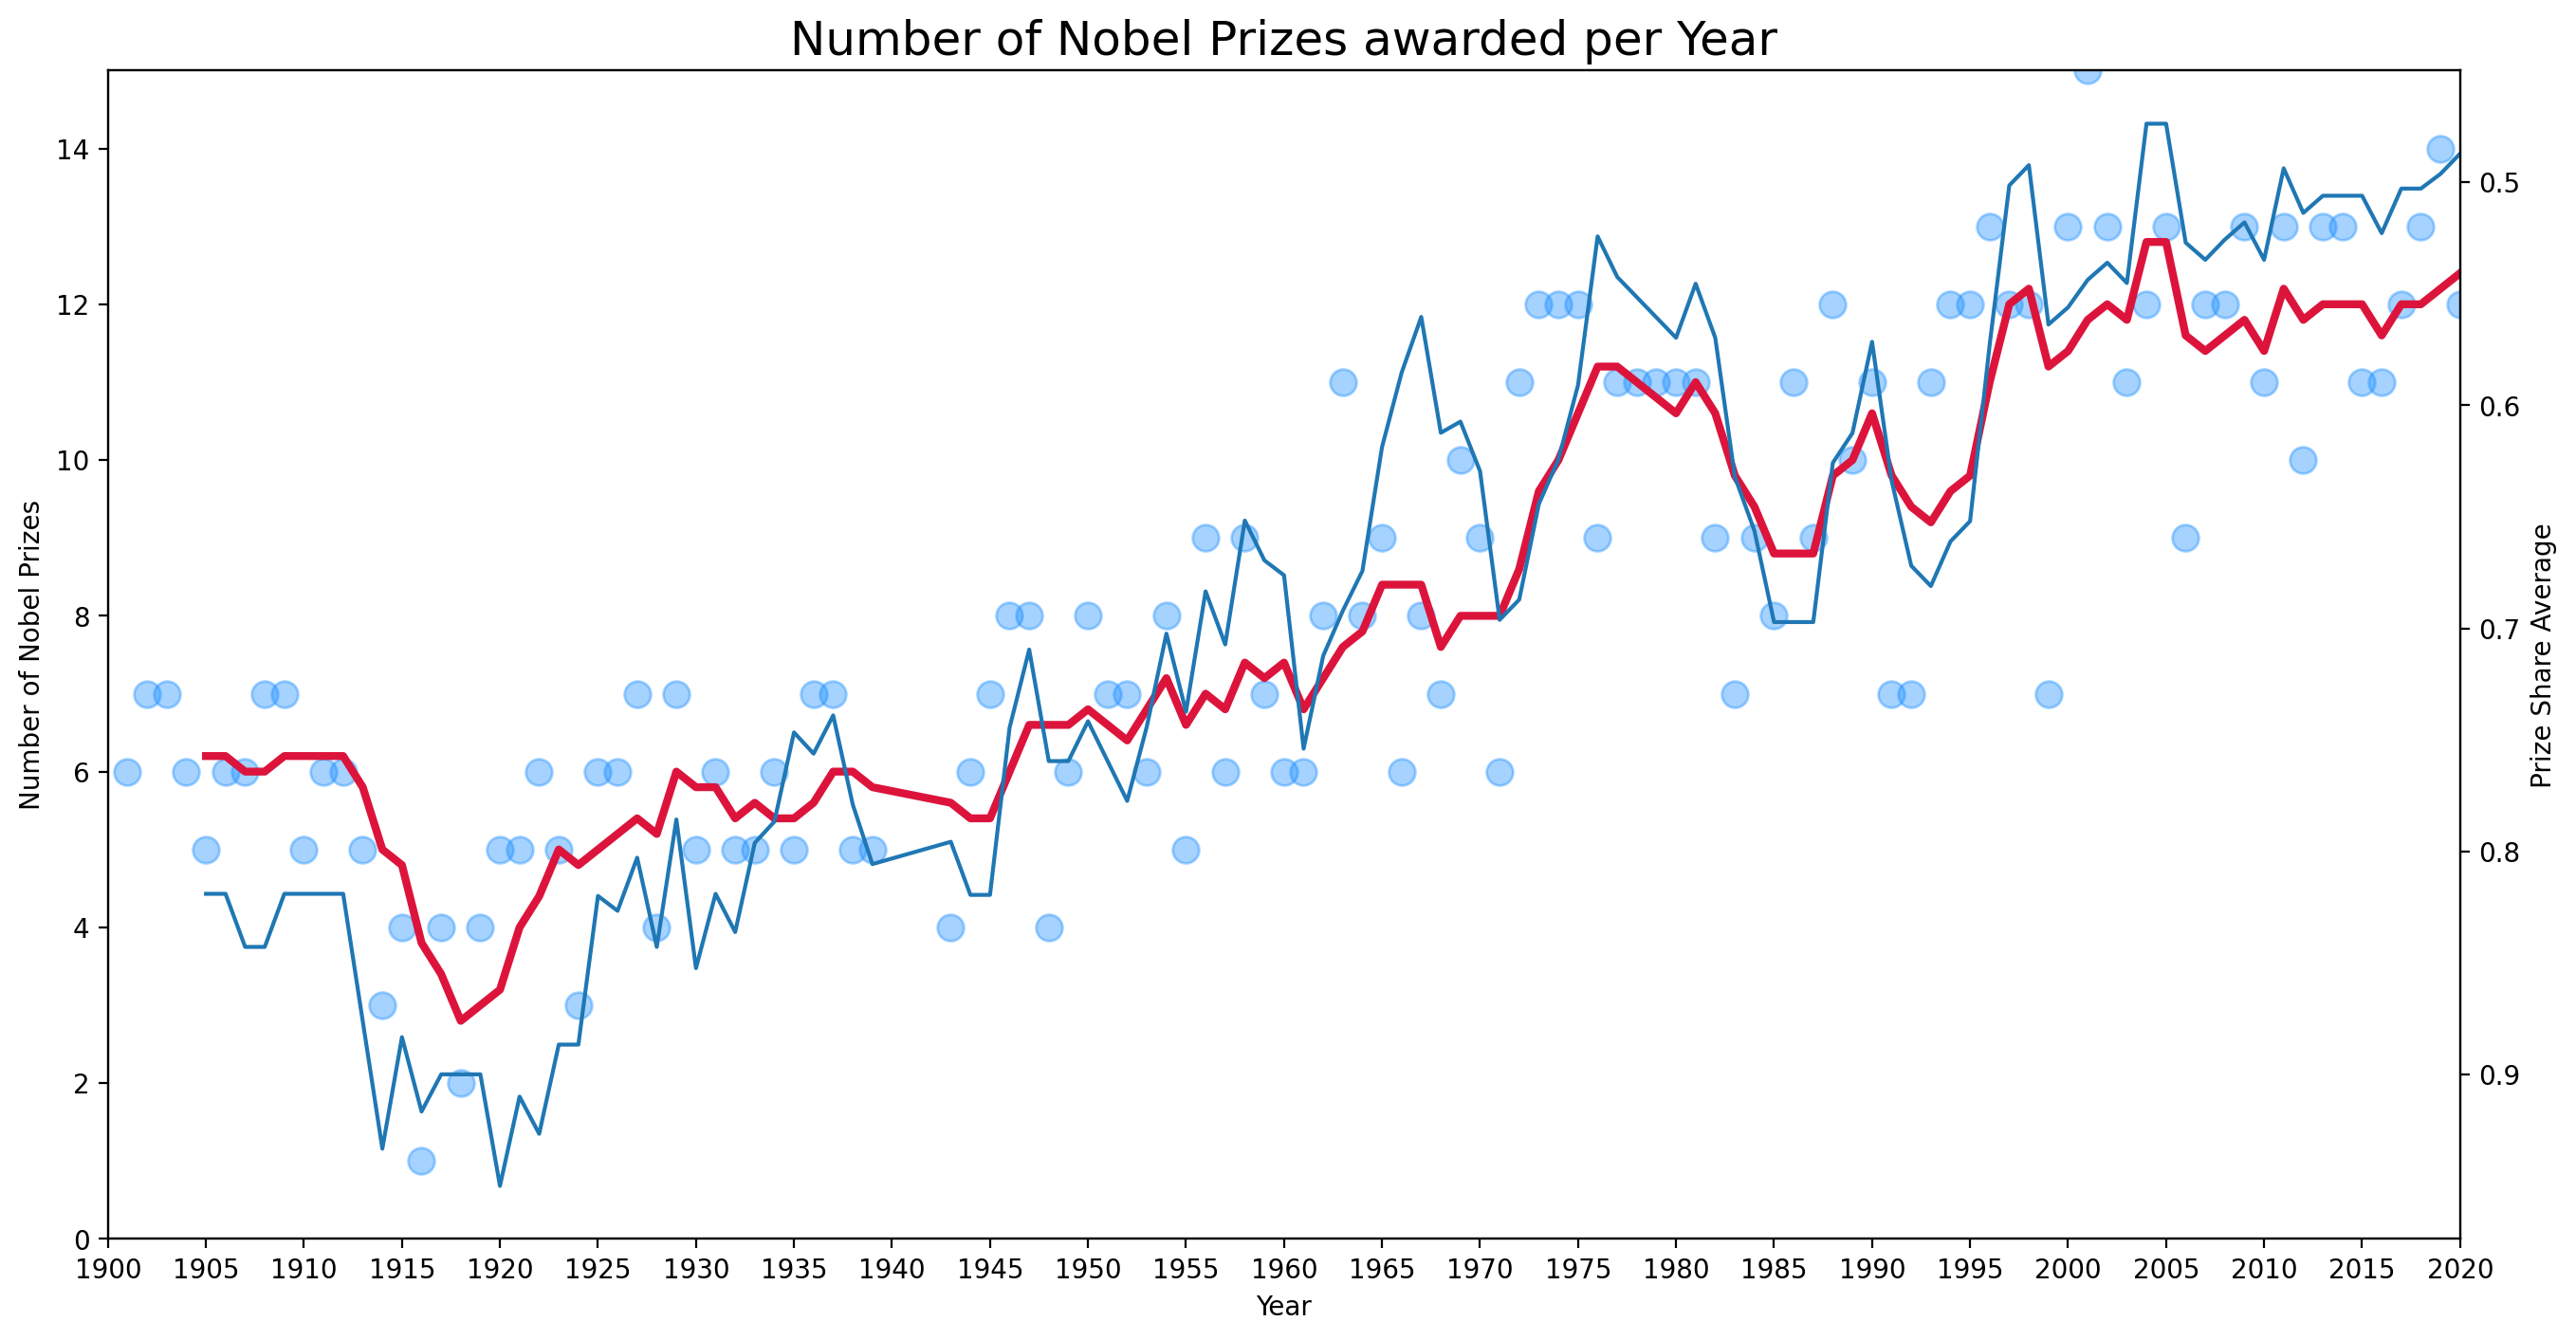

In [30]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes awarded per Year", fontsize=18)
plt.xticks(ticks)

ax1= plt.gca()
ax2=ax1.twinx()
ax1.set_xlim(1900,2020)
ax1.set_ylim(0,prize_per_year["prize"].max())
ax1.set_ylabel("Number of Nobel Prizes")
ax1.set_xlabel("Year")
ax2.set_ylabel("Prize Share Average")
ax2.invert_yaxis()
ax1.scatter(prize_per_year.index,
            prize_per_year.values,
            color="dodgerblue",
            alpha=0.4,
            s=100)
ax1.plot(prize_per_year.index,
         rolling_mean_prize_per_year.values,
         color="crimson",
         linewidth=3)
ax2.plot(prize_per_year.index,
         rolling_mean_prize_share.values)
plt.show()

# The Countries with the Most Nobel Prizes

In [31]:
all_countries = df_data.groupby("birth_country_current", as_index=False).agg({"prize": pd.Series.count})
top20_countries = all_countries.sort_values("prize", ascending=False)[:20]
top20_countries.head()

birth_country_current  prize
74  United States of America    281
73            United Kingdom    105
26                   Germany     84
25                    France     57
67                    Sweden     29

In [32]:
figure = px.bar(x=top20_countries.prize,
                y=top20_countries.birth_country_current, 
                orientation="h",
                title="Top 20 Countries by Number of Prizes",
                color=top20_countries.prize,
                color_continuous_scale="viridis")

figure.update_layout(xaxis_title="Number of Prizes",
                     yaxis_title="Country",
                     coloraxis_showscale=False,
                     yaxis={"categoryorder": "total ascending"})

figure.show()

# Number of Prizes Won by Country

In [33]:
countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize": pd.Series.count})
countries.head()

birth_country_current  ISO  prize
0               Algeria  DZA      2
1             Argentina  ARG      4
2             Australia  AUS     10
3               Austria  AUT     18
4            Azerbaijan  AZE      1

In [34]:
world_map = px.choropleth(data_frame=countries, 
                          locations="ISO",
                          color="prize",
                          hover_name="birth_country_current",
                          color_continuous_scale="matter")
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

In [35]:
cat_country = df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})
cat_country.rename(columns={"prize": "cat_prize"}, inplace=True)
cat_country.sort_values("cat_prize", ascending=False, inplace=True)
cat_country_prize = pd.merge(cat_country, top20_countries, on="birth_country_current")  
cat_country_prize.rename(columns={"prize": "total_prize"}, inplace=True)
cat_country_prize.head()     

birth_country_current   category  cat_prize  total_prize
0  United States of America   Medicine         78          281
1  United States of America    Physics         70          281
2  United States of America  Chemistry         55          281
3  United States of America  Economics         49          281
4  United States of America      Peace         19          281

In [36]:
figure = px.bar(x=cat_country_prize["cat_prize"],
                y=cat_country_prize["birth_country_current"], 
                color=cat_country_prize["category"], 
                orientation="h",
                title="Prizes per Category by Country")
figure.update_layout(xaxis_title="Number of Prizes",
                     yaxis_title="Country",
                     yaxis={"categoryorder": "total ascending"})
figure.show()

Observations:
<ul>
    <li> Germany and Japan are the weakest in Economics compared to the USA </li>
    <li> Germany has more prizes in Physics and Literature than the UK</li>
    <li> France has more prizes in Economics, Peace and Literature than Germany</li>
    <li> Austria won most prizes for medicine</li>
    <li> The Netherlands got half of their prizes for Physics</li>
</ul>

### Number of Prizes Won by Each Country Over Time

In [37]:
prize_by_year = df_data.groupby(["birth_country_current", "year"], as_index=False).count()
prize_by_year = prize_by_year.sort_values("year")[["year", "birth_country_current", "prize"]]
# https://stackoverflow.com/questions/22650833/pandas-groupby-cumulative-sum
cum_prizes = prize_by_year.groupby(["birth_country_current", "year"]).sum().groupby(level=[0]).cumsum()
cum_prizes.reset_index(inplace=True)
print(prize_by_year.head())
cum_prizes.head()

     year birth_country_current  prize
118  1901                France      2
346  1901                Poland      1
159  1901               Germany      1
312  1901           Netherlands      1
440  1901           Switzerland      1


birth_country_current  year  prize
0               Algeria  1957      1
1               Algeria  1997      2
2             Argentina  1936      1
3             Argentina  1947      2
4             Argentina  1980      3

In [38]:
cumulative_prize_by_country = px.line(x=cum_prizes["year"],
                                      y=cum_prizes["prize"],
                                      color=cum_prizes["birth_country_current"],
                                      title="Cumulative Prizes by Country")
cumulative_prize_by_country.update_layout(xaxis_title="Year",
                                          yaxis_title="Cumulative Number of Prizes")
cumulative_prize_by_country.show()

The United States really started to take off after the Second World War. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days.

# What are the Top Research Organisations?

In [39]:
prize_per_orga = df_data.groupby("organization_name", as_index=False).agg({"prize": pd.Series.count})
top20_orga = prize_per_orga.sort_values("prize", ascending=False)[:20]

In [40]:
orga_barchart = px.bar(x=top20_orga["prize"],
                       y=top20_orga["organization_name"],
                       orientation="h",
                       title="Top 20 Research Institution by Number of Prizes",
                       color_continuous_scale="viridis",
                       color=top20_orga["prize"])
orga_barchart.update_layout(xaxis_title="Number of Prizes",
                           yaxis_title="Institutions",
                           yaxis={"categoryorder": "total ascending"},
                          coloraxis_showscale=False)
orga_barchart.show()

# Which Cities Make the Most Discoveries? 

In [41]:
prize_per_city = df_data.groupby("organization_city", as_index=False).agg({"prize": pd.Series.count})
top20_cities = prize_per_city.sort_values("prize", ascending=False)[:20]

In [42]:
city_barchart = px.bar(x=top20_cities["prize"],
                       y=top20_cities["organization_city"],
                       orientation="h",
                       title="Top 20 Cities by Number of Prizes",
                       color_continuous_scale="viridis",
                       color=top20_cities.prize)
city_barchart.update_layout(xaxis_title="Number of Prizes",
                           yaxis_title="Cities",
                           yaxis={"categoryorder": "total ascending"},
                          coloraxis_showscale=False)
city_barchart.show()

# Where are Nobel Laureates Born?

In [43]:
birth_cities = df_data.groupby("birth_city", as_index=False).agg({"prize": pd.Series.count})
top20_birth = birth_cities.sort_values("prize", ascending=False)[:20]

In [44]:
birth_barchart = px.bar(x=top20_birth["prize"],
                       y=top20_birth["birth_city"],
                       orientation="h",
                       title="Top 20 Birth-cities by Number of Prizes",
                       color_continuous_scale="plasma",
                       color=top20_birth["prize"])
birth_barchart.update_layout(xaxis_title="Number of Prizes",
                           yaxis_title="Birth-Cities",
                           yaxis={"categoryorder": "total ascending"},
                          coloraxis_showscale=False)
birth_barchart.show()

In [45]:
# total number of Prizes US: 281
percentage = round(53/281*100)
print(f"The percentage of Nobel laureates born in New York of the total Prizes in the US is: {percentage}% ")

The percentage of Nobel laureates born in New York of the total Prizes in the US is: 19% 


# Plotly Sunburst Chart: Country, City, and Organisation

In [46]:
for_sunburst = df_data.groupby(["organization_country", "organization_city", "organization_name"],as_index=False).agg({"prize": pd.Series.count})


In [47]:
sunburst = px.sunburst(data_frame=for_sunburst,
                       path=["organization_country", "organization_city", "organization_name"], 
                       values="prize",
                       title="Where do discoveries take place?")
sunburst.show()

# Patterns in the Laureate Age at the Time of the Award

In [48]:
birthdates = df_data["birth_date"].dt.year
df_data["winning_age"] = df_data["year"] - birthdates

In [106]:
df_data.describe()

year  share_pct  winning_age
count   962.00     962.00       934.00
mean  1,971.82       0.63        59.95
std      33.81       0.29        12.62
min   1,901.00       0.25        17.00
25%   1,948.00       0.33        51.00
50%   1,977.00       0.50        60.00
75%   2,001.00       1.00        69.00
max   2,020.00       1.00        97.00

In [57]:
# who was the youngest and oldest winner?
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU       0.33        97.00

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK       0.50        17.00

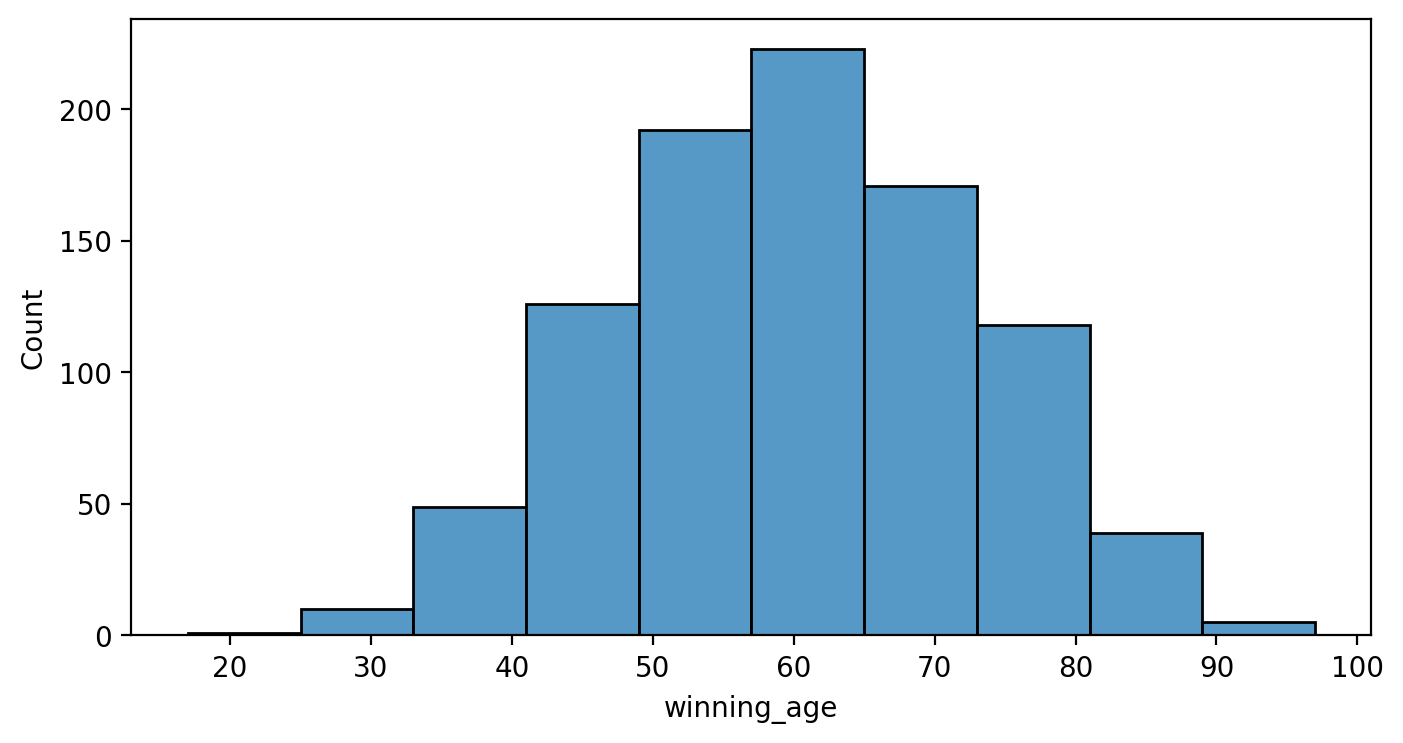

In [62]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.histplot (data=df_data,
                   x="winning_age",
                   bins=10)
plt.show()

### Age at Time of Award throughout History

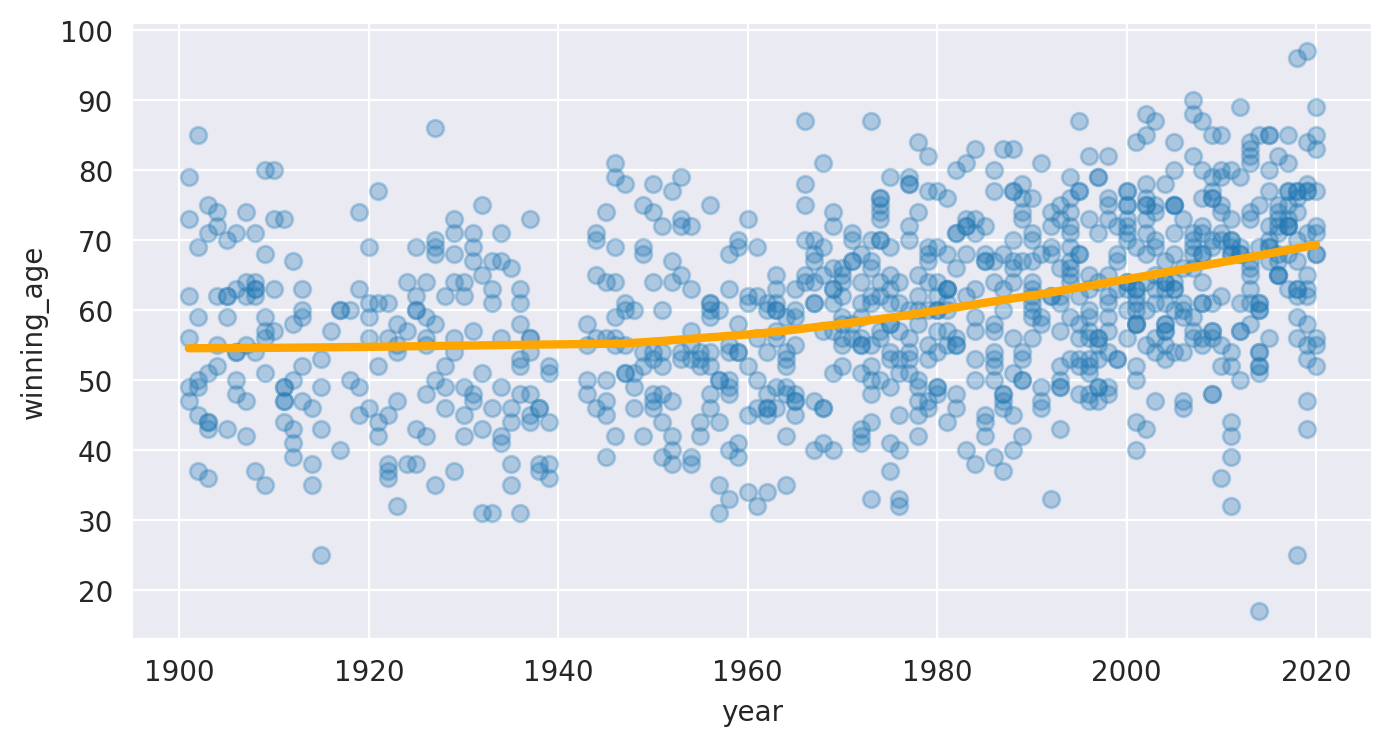

In [63]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=df_data,
                  x="year", 
                  y="winning_age",
                  scatter_kws={"alpha": 0.3},
                  line_kws={"color": "orange", "linewidth": 3},
                  lowess = True)
plt.show()

### Winning Age Across the Nobel Prize Categories

In [64]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.boxplot(data=df_data,
                 x="category",
                 y="winning_age")
plt.show()

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



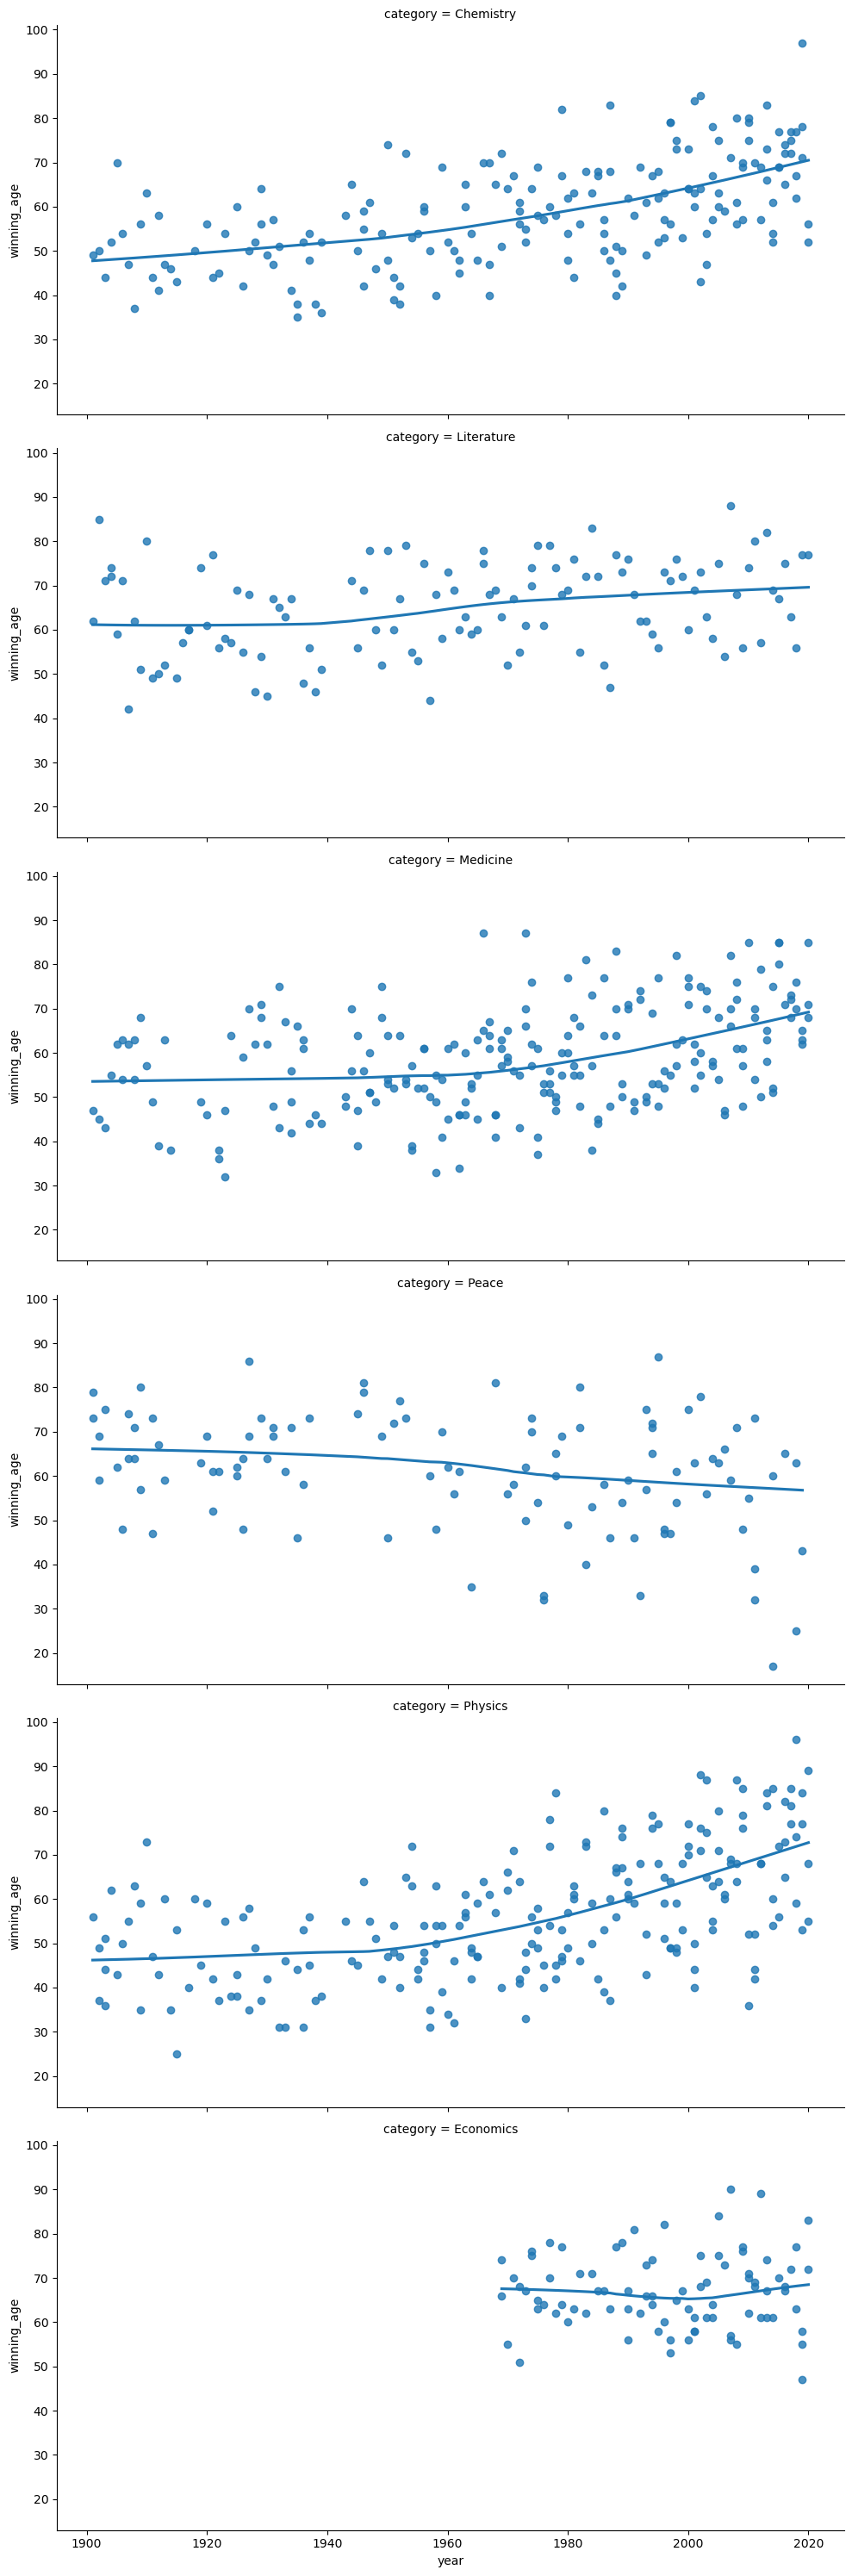

In [65]:
ax = sns.lmplot(data=df_data,
                x="year",
                y="winning_age",
                row="category",
                aspect=2,
                lowess=True)
plt.show()

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



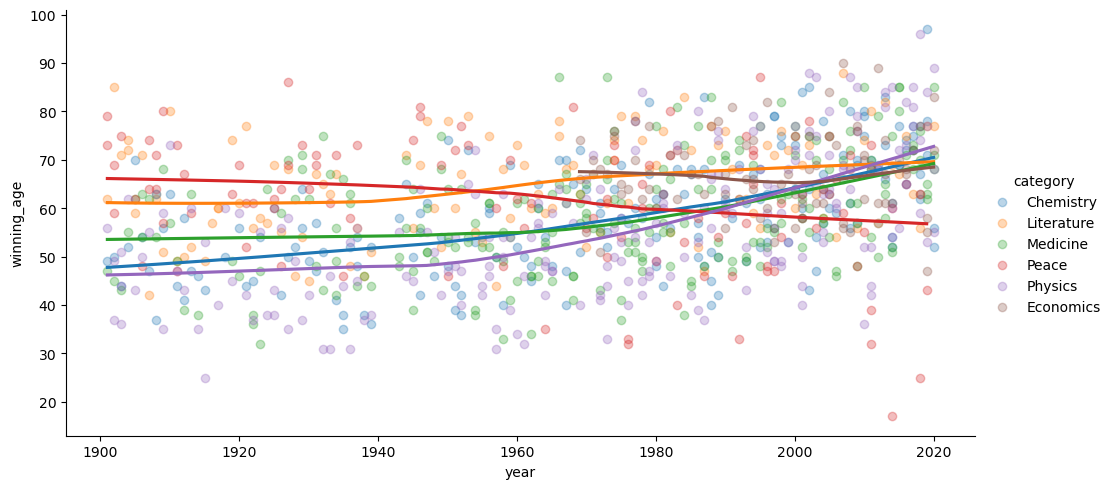

In [66]:
ax = sns.lmplot(data=df_data,
                x="year",
                y="winning_age",
                hue="category",
                lowess=True,
                aspect=2,
                scatter_kws={"alpha": 0.3})
plt.show()